<a href="https://colab.research.google.com/github/mateuszrajca69/Uczenie-maszynowe/blob/main/praca_uczenie_maszynowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
NUM_TRIALS = 1000
BANDIT_PROBABILITIES = [0.75, 0.5, 0.25, 0.25]
EPSILON = 0.4

In [ ]:
class Bandit_Optimistic:
  def __init__(self, q):
    self.q = q
    self.q_estimate = 5.
    self.N = 0.

  def pull(self):
    return np.random.random() < self.q

  def update(self, r):
    self.N += 1.
    self.q_estimate = ((self.N - 1)*self.q_estimate + r) / self.N

średnie oszacowanie: 0.7401812688821747
średnie oszacowanie: 0.0
średnie oszacowanie: 0.3333333333333333
średnie oszacowanie: 0.3333333333333333
całkowita zdobyta nagroda: 737.0
ogólny wskaźnik wygranych: 0.737
tyle razy wybrano każdego bandytę: [993.0, 1.0, 3.0, 3.0]


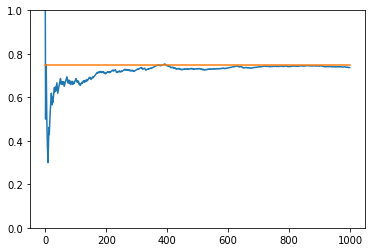

In [ ]:
def experiment_optimistic():
  bandits = [Bandit_Optimistic(q) for q in BANDIT_PROBABILITIES]

  rewards = np.zeros(NUM_TRIALS)
  for i in range(NUM_TRIALS):
    j = np.argmax([b.q_estimate for b in bandits])

    r = bandits[j].pull()

    rewards[i] = r

    bandits[j].update(r)


  for b in bandits:
    print("średnie oszacowanie:", b.q_estimate)

  print("całkowita zdobyta nagroda:", rewards.sum())
  print("ogólny wskaźnik wygranych:", rewards.sum() / NUM_TRIALS)
  print("tyle razy wybrano każdego bandytę/preparat:", [b.N for b in bandits])

  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
  plt.ylim([0, 1])
  plt.plot(win_rates)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.show()

if __name__ == "__main__":
  experiment_optimistic()

Hipoteza z wynikiem działania algorytmu jest poprawna, pokrywa się ona z założeniami na temat najlepszego preparatu.

Testujemy preparat wykonując 1000 prób posiadając 4 preparaty o różnym prawdopodobieństwu skuteczności w efekcie otzrymujemy średnie oszacowanie wynoszące =0.74 .

Znajdujemy najlepszy preparat, który pokrywa się z podanymi danymi w zadaniu.. oczywiście był on  testowany metodą optymistycznych wartości początkowych. 
